# Importing the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

# Data investigation

In [2]:
# uploading the table
df = pd.read_csv("df_1_year.csv", index_col=0)
df.head(10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Year,Month,ride_length,Year-Month
0,99103BB87CC6C1BB,electric_bike,2021-08-10 17:15:49,2021-08-10 17:22:44,NaN,NaN,NaN,NaN,41.77,-87.68,41.77,-87.68,member,2021,8,6.916667,2021-08-01 00:00:00
1,EAFCCCFB0A3FC5A1,electric_bike,2021-08-10 17:23:14,2021-08-10 17:39:24,NaN,NaN,NaN,NaN,41.77,-87.68,41.77,-87.63,member,2021,8,16.166667,2021-08-01 00:00:00
2,9EF4F46C57AD234D,electric_bike,2021-08-21 02:34:23,2021-08-21 02:50:36,NaN,NaN,NaN,NaN,41.95,-87.65,41.97,-87.66,member,2021,8,16.216667,2021-08-01 00:00:00
5,612F12C94A964F3E,electric_bike,2021-08-19 12:41:12,2021-08-19 12:47:47,NaN,NaN,NaN,NaN,41.81,-87.61,41.80,-87.60,member,2021,8,6.583333,2021-08-01 00:00:00
6,C7435946FDFFA9B7,electric_bike,2021-08-19 12:21:50,2021-08-19 12:37:31,NaN,NaN,NaN,NaN,41.77,-87.62,41.81,-87.61,member,2021,8,15.683333,2021-08-01 00:00:00
8,ABC4532F2B4983AB,electric_bike,2021-08-17 18:23:55,2021-08-17 18:24:13,NaN,NaN,NaN,NaN,41.92,-87.66,41.92,-87.66,member,2021,8,0.300000,2021-08-01 00:00:00
9,82437E52DC3B9A8A,electric_bike,2021-08-04 12:50:53,2021-08-04 13:08:20,NaN,NaN,NaN,NaN,41.74,-87.53,41.74,-87.53,member,2021,8,17.450000,2021-08-01 00:00:00
10,2FF71C763499B208,electric_bike,2021-08-01 18:11:35,2021-08-01 18:17:05,NaN,NaN,NaN,NaN,41.95,-87.71,41.97,-87.71,member,2021,8,5.500000,2021-08-01 00:00:00
11,B172B2E331744FE9,electric_bike,2021-08-01 18:26:59,2021-08-01 18:32:23,NaN,NaN,NaN,NaN,41.97,-87.71,41.96,-87.71,member,2021,8,5.400000,2021-08-01 00:00:00
12,B161B34EC9BB652B,electric_bike,2021-08-01 08:16:41,2021-08-01 08:46:14,NaN,NaN,NaN,NaN,41.96,-87.71,41.89,-87.65,member,2021,8,29.550000,2021-08-01 00:00:00


In [3]:
# checking the number of rows & columns
df.shape

(3235887, 17)

In [4]:
# Checking the name of columns
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'Year', 'Month', 'ride_length', 'Year-Month'],
      dtype='object')

In [5]:
# Checking the type of each variable
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3235887 entries, 0 to 823487
Data columns (total 17 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
 13  Year                int64  
 14  Month               int64  
 15  ride_length         float64
 16  Year-Month          object 
dtypes: float64(5), int64(2), object(10)
memory usage: 444.4+ MB


For the analysis: we can remove "ride_id" (unique value id) that won't be necessary for analysis

Variables that can be analysed:
- Station names (start & end)
- rideable_type
- started_at & ended_at (hours of usage)
- Month
- ride_length

Variables that can be used has variables of split:
- rideable_type
- station_name (start & end)
- member_casual
- Year-Month, Month, started_at & ended_at (for hours)

In [6]:
# Checking if there are null values
print(pd.isnull(df).sum())

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    505434
start_station_id      505432
end_station_name      540763
end_station_id        540763
start_lat                  0
start_lng                  0
end_lat                  218
end_lng                  218
member_casual              0
Year                       0
Month                      0
ride_length                0
Year-Month                 0
dtype: int64


Checking value count for possible split of data for analysis

In [7]:
df["rideable_type"].value_counts()

classic_bike     1663393
electric_bike    1483437
docked_bike        89057
Name: rideable_type, dtype: int64

3 types of bikes, although the last ones is only 2.75% of the data

In [8]:
df["start_station_name"].value_counts()

Streeter Dr & Grand Ave                          37925
Wells St & Concord Ln                            24393
DuSable Lake Shore Dr & North Blvd               23904
Clark St & Elm St                                21534
Wells St & Elm St                                20792
                                                 ...  
Al Raby School                                       1
Public Rack - Sawyer Ave & Bryn Mawr Ave - SW        1
Public Rack - Central Ave & North Ave                1
Calumet Ave & 103rd St                               1
Back of the Yards Park                               1
Name: start_station_name, Length: 1324, dtype: int64

In [9]:
df["end_station_name"].value_counts()

Streeter Dr & Grand Ave                     35661
DuSable Lake Shore Dr & North Blvd          26595
Wells St & Concord Ln                       25376
Clark St & Elm St                           21726
Michigan Ave & Oak St                       20557
                                            ...  
Morgan St & 103rd St                            1
Public Rack - Kedzie Ave & Arthington St        1
Whippie St & 26th St                            1
Tuley (Murray) Park                             1
May St & 78th St                                1
Name: end_station_name, Length: 1333, dtype: int64

1324 to 1333 stations available

In [10]:
# Checking the range of lattitude and longitude
print("(",min(df.start_lat),max(df.start_lat), ")")
print("(",min(df.start_lng),max(df.start_lng), ")")
print("(",min(df.end_lat),max(df.end_lat), ")")
print("(",min(df.end_lng),max(df.end_lng), ")")

( 41.64 42.07 )
( -87.84 -87.52 )
( 41.6 42.11 )
( -87.87 -87.5 )


This data min and max investigation on lattitude and longitude shows that this refers bike rides in Chicago area

In [11]:
df["member_casual"].value_counts()

member    1916317
casual    1319570
Name: member_casual, dtype: int64

2 types of users : members and casual users

In [12]:
df["Year"].value_counts()

2022    1697488
2021    1538399
Name: Year, dtype: int64

In [13]:
df["Month"].value_counts()

7     486749
8     468669
6     439719
9     429168
5     344221
10    341645
4     187188
11    180200
3     137412
12    118717
2      53909
1      48290
Name: Month, dtype: int64

In [14]:
pd.DataFrame(df["Year-Month"].value_counts())

,Year-Month
2022-07-01 00:00:00,486749
2021-08-01 00:00:00,468669
2022-06-01 00:00:00,439719
2021-09-01 00:00:00,429168
2022-05-01 00:00:00,344221
2021-10-01 00:00:00,341645
2022-04-01 00:00:00,187188
2021-11-01 00:00:00,180200
2022-03-01 00:00:00,137412
2021-12-01 00:00:00,118717


All the data are showing bikes for 1 rolling year

In [15]:
# transforming the date & hours, to datetime
df['started_at'] = pd.to_datetime(df['started_at'])
df['Year-Month'] = pd.to_datetime(df['Year-Month'])

In [16]:
# extracting hours and minutes
df['started_at_hour'] = df['started_at'].dt.hour
df['started_at_minute'] = df['started_at'].dt.minute


df['year_str'] = df['Year-Month'].dt.strftime("%B %Y")

df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Year,Month,ride_length,Year-Month,started_at_hour,started_at_minute,year_str
0,99103BB87CC6C1BB,electric_bike,2021-08-10 17:15:49,2021-08-10 17:22:44,NaN,NaN,NaN,NaN,41.77,-87.68,41.77,-87.68,member,2021,8,6.916667,2021-08-01,17,15,August 2021
1,EAFCCCFB0A3FC5A1,electric_bike,2021-08-10 17:23:14,2021-08-10 17:39:24,NaN,NaN,NaN,NaN,41.77,-87.68,41.77,-87.63,member,2021,8,16.166667,2021-08-01,17,23,August 2021
2,9EF4F46C57AD234D,electric_bike,2021-08-21 02:34:23,2021-08-21 02:50:36,NaN,NaN,NaN,NaN,41.95,-87.65,41.97,-87.66,member,2021,8,16.216667,2021-08-01,2,34,August 2021
5,612F12C94A964F3E,electric_bike,2021-08-19 12:41:12,2021-08-19 12:47:47,NaN,NaN,NaN,NaN,41.81,-87.61,41.80,-87.60,member,2021,8,6.583333,2021-08-01,12,41,August 2021
6,C7435946FDFFA9B7,electric_bike,2021-08-19 12:21:50,2021-08-19 12:37:31,NaN,NaN,NaN,NaN,41.77,-87.62,41.81,-87.61,member,2021,8,15.683333,2021-08-01,12,21,August 2021


In [17]:

# combining hour and minute
# 10:15 => will be 10n25, 10:20 will be 10,333
def combine_hour_minute(row):
    return round(float(row['started_at_hour']) + float(row['started_at_minute'] / 60),2)

df['started_at_hour_minute'] = df.apply(combine_hour_minute, axis=1)
df.head(10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,end_lng,member_casual,Year,Month,ride_length,Year-Month,started_at_hour,started_at_minute,year_str,started_at_hour_minute
0,99103BB87CC6C1BB,electric_bike,2021-08-10 17:15:49,2021-08-10 17:22:44,NaN,NaN,NaN,NaN,41.77,-87.68,...,-87.68,member,2021,8,6.916667,2021-08-01,17,15,August 2021,17.25
1,EAFCCCFB0A3FC5A1,electric_bike,2021-08-10 17:23:14,2021-08-10 17:39:24,NaN,NaN,NaN,NaN,41.77,-87.68,...,-87.63,member,2021,8,16.166667,2021-08-01,17,23,August 2021,17.38
2,9EF4F46C57AD234D,electric_bike,2021-08-21 02:34:23,2021-08-21 02:50:36,NaN,NaN,NaN,NaN,41.95,-87.65,...,-87.66,member,2021,8,16.216667,2021-08-01,2,34,August 2021,2.57
5,612F12C94A964F3E,electric_bike,2021-08-19 12:41:12,2021-08-19 12:47:47,NaN,NaN,NaN,NaN,41.81,-87.61,...,-87.60,member,2021,8,6.583333,2021-08-01,12,41,August 2021,12.68
6,C7435946FDFFA9B7,electric_bike,2021-08-19 12:21:50,2021-08-19 12:37:31,NaN,NaN,NaN,NaN,41.77,-87.62,...,-87.61,member,2021,8,15.683333,2021-08-01,12,21,August 2021,12.35
8,ABC4532F2B4983AB,electric_bike,2021-08-17 18:23:55,2021-08-17 18:24:13,NaN,NaN,NaN,NaN,41.92,-87.66,...,-87.66,member,2021,8,0.300000,2021-08-01,18,23,August 2021,18.38
9,82437E52DC3B9A8A,electric_bike,2021-08-04 12:50:53,2021-08-04 13:08:20,NaN,NaN,NaN,NaN,41.74,-87.53,...,-87.53,member,2021,8,17.450000,2021-08-01,12,50,August 2021,12.83
10,2FF71C763499B208,electric_bike,2021-08-01 18:11:35,2021-08-01 18:17:05,NaN,NaN,NaN,NaN,41.95,-87.71,...,-87.71,member,2021,8,5.500000,2021-08-01,18,11,August 2021,18.18
11,B172B2E331744FE9,electric_bike,2021-08-01 18:26:59,2021-08-01 18:32:23,NaN,NaN,NaN,NaN,41.97,-87.71,...,-87.71,member,2021,8,5.400000,2021-08-01,18,26,August 2021,18.43
12,B161B34EC9BB652B,electric_bike,2021-08-01 08:16:41,2021-08-01 08:46:14,NaN,NaN,NaN,NaN,41.96,-87.71,...,-87.65,member,2021,8,29.550000,2021-08-01,8,16,August 2021,8.27


In [18]:
df.drop(columns="ride_id", inplace=True)

# Create charts using Seaborn
## 1. Hour of usage bar chart by month

In [19]:
monthly_ride = df.groupby(["Year-Month"])['ride_length'].sum().reset_index()
monthly_ride

,Year-Month,ride_length
0,2021-08-01,6.491848e+06
1,2021-09-01,5.740153e+06
2,2021-10-01,4.149016e+06
3,2021-11-01,1.909980e+06
4,2021-12-01,1.248289e+06
5,2022-01-01,4.803357e+05
6,2022-02-01,5.461004e+05
7,2022-03-01,1.573029e+06
8,2022-04-01,2.138354e+06
9,2022-05-01,4.440346e+06


Text(0, 0.5, 'Temps')

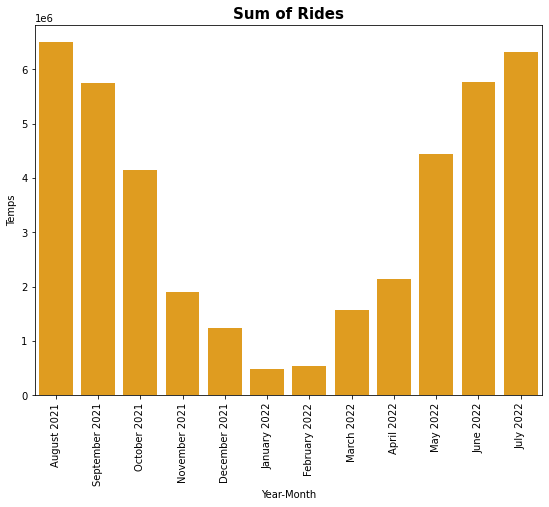

In [20]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.title('Sum of Rides', size='15', fontweight='bold')
ax = sns.barplot(x = monthly_ride['Year-Month'],y = monthly_ride['ride_length'],color="orange")
ax.set_xticklabels(['August 2021', 'September 2021', 'October 2021', 'November 2021', 'December 2021', 'January 2022', 'February 2022', 'March 2022', 'April 2022', 'May 2022', 'June 2022', 'July 2022'],rotation=90)
plt.ylabel("Temps")

## 2. Violin chart of ride duration par bike type 

Text(0, 0.5, 'Duration')

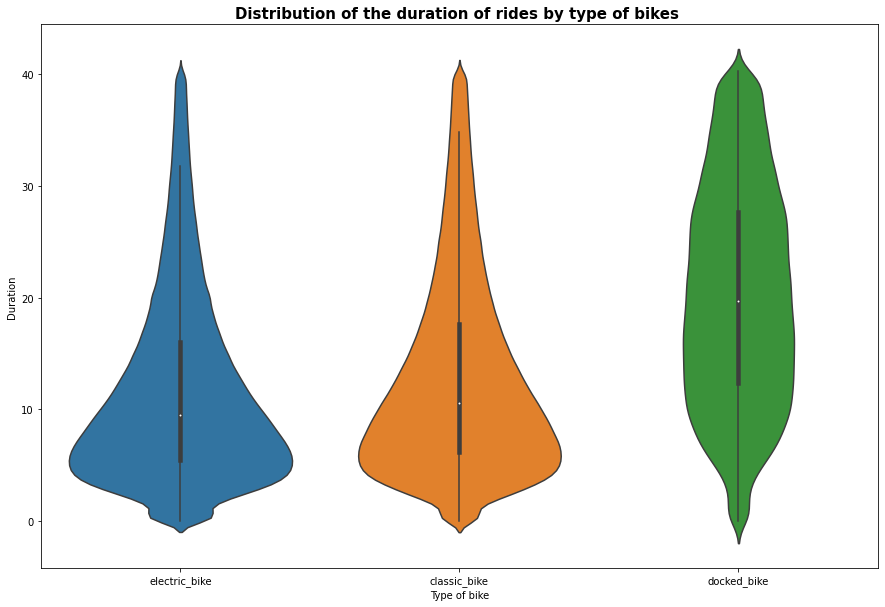

In [21]:
plt.figure(figsize=(15,10))
sns.violinplot(x= 'rideable_type', y= 'ride_length', data= df)
plt.title('Distribution of the duration of rides by type of bikes ', size='15', fontweight='bold')
plt.xlabel("Type of bike")
plt.ylabel("Duration")

## 3. Point Plot of average duration by  bike type

In [22]:
point_df=df.groupby(["rideable_type","Year-Month"])['ride_length'].mean().reset_index()
point_df

,rideable_type,Year-Month,ride_length
0,classic_bike,2021-08-01,13.712304
1,classic_bike,2021-09-01,13.260800
2,classic_bike,2021-10-01,12.294709
3,classic_bike,2021-11-01,10.973676
4,classic_bike,2021-12-01,10.852582
5,classic_bike,2022-01-01,10.075814
6,classic_bike,2022-02-01,10.269879
7,classic_bike,2022-03-01,11.825858
8,classic_bike,2022-04-01,11.904795
9,classic_bike,2022-05-01,13.370926


Text(0, 0.5, 'duration')

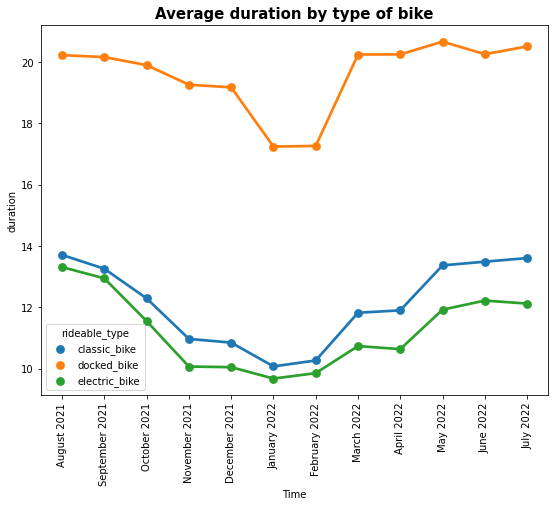

In [23]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.title('Average duration by type of bike', size='15', fontweight='bold')

ax1=sns.pointplot(x = point_df['Year-Month'],y = point_df['ride_length'], hue = point_df['rideable_type'])
ax1.set_xticklabels(['August 2021', 'September 2021', 'October 2021', 'November 2021', 'December 2021', 'January 2022', 'February 2022', 'March 2022', 'April 2022', 'May 2022', 'June 2022', 'July 2022'],rotation=90)

plt.xlabel("Time")
plt.ylabel("duration")

## 4. Boxplot of rides length per month

Text(0, 0.5, 'duration')

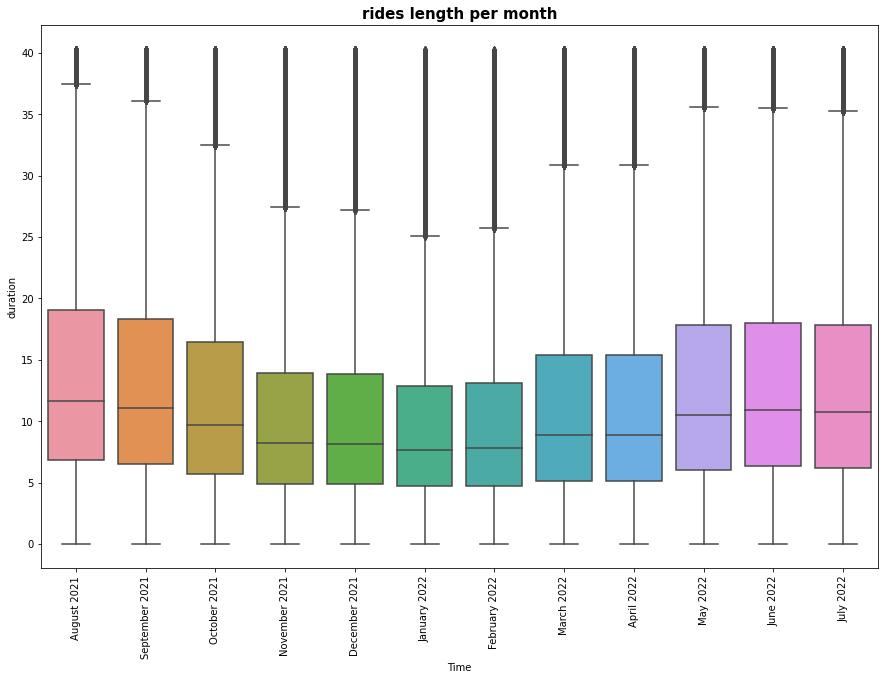

In [24]:
plt.figure(figsize=(15,10))
ax3=sns.boxplot(x=df["Year-Month"],y=df["ride_length"])
plt.title('rides length per month', size='15', fontweight='bold')

ax3.set_xticklabels(['August 2021', 'September 2021', 'October 2021', 'November 2021', 'December 2021', 'January 2022', 'February 2022', 'March 2022', 'April 2022', 'May 2022', 'June 2022', 'July 2022'],rotation=90)

plt.xlabel("Time")
plt.ylabel("duration")

## 5. Area plot of bike type usage per month

In [25]:

area=pd.crosstab(df["Year-Month"], df["member_casual"])
area = area.reset_index()

<Figure size 1440x1080 with 0 Axes>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


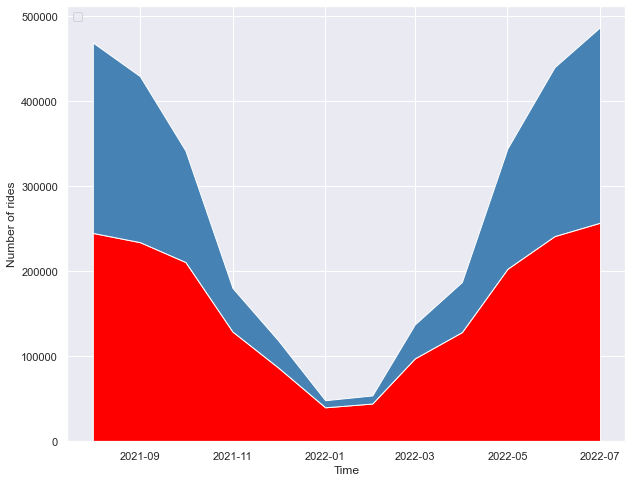

In [38]:
plt.figure(figsize=(10,8))
color_map = ['red', 'steelblue']
sns.set_theme()    
#create area chart
plt.stackplot(area["Year-Month"], area["member"], area["casual"],colors=color_map)

#add legend
plt.legend(loc='upper left')
#set_xticklabels(['August 2021', 'September 2021', 'October 2021', 'November 2021', 'December 2021', 'January 2022', 'February 2022', 'March 2022', 'April 2022', 'May 2022', 'June 2022', 'July 2022'],rotation=90)

#add axis labels
plt.xlabel('Time')
plt.ylabel('Number of rides')

#display area chart
plt.show()

## 6. Pie chart  of proportion of duration ridese (potential broken bikes <2 minutes)

In [27]:
bins = [0, 2, 5, 50]
labels=["<2 minutes","2-5 minutes",">5 minutes"]
df['time'] = pd.cut(x = df['ride_length'], bins = bins, labels = labels, include_lowest = True)
df.head(5)

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,...,member_casual,Year,Month,ride_length,Year-Month,started_at_hour,started_at_minute,year_str,started_at_hour_minute,time
0,electric_bike,2021-08-10 17:15:49,2021-08-10 17:22:44,NaN,NaN,NaN,NaN,41.77,-87.68,41.77,...,member,2021,8,6.916667,2021-08-01,17,15,August 2021,17.25,>5 minutes
1,electric_bike,2021-08-10 17:23:14,2021-08-10 17:39:24,NaN,NaN,NaN,NaN,41.77,-87.68,41.77,...,member,2021,8,16.166667,2021-08-01,17,23,August 2021,17.38,>5 minutes
2,electric_bike,2021-08-21 02:34:23,2021-08-21 02:50:36,NaN,NaN,NaN,NaN,41.95,-87.65,41.97,...,member,2021,8,16.216667,2021-08-01,2,34,August 2021,2.57,>5 minutes
5,electric_bike,2021-08-19 12:41:12,2021-08-19 12:47:47,NaN,NaN,NaN,NaN,41.81,-87.61,41.80,...,member,2021,8,6.583333,2021-08-01,12,41,August 2021,12.68,>5 minutes
6,electric_bike,2021-08-19 12:21:50,2021-08-19 12:37:31,NaN,NaN,NaN,NaN,41.77,-87.62,41.81,...,member,2021,8,15.683333,2021-08-01,12,21,August 2021,12.35,>5 minutes


In [29]:
time_labels = df.groupby(df["time"]).count()['ride_length']
time_labels


time
<2 minutes      118711
2-5 minutes     498215
>5 minutes     2618961
Name: ride_length, dtype: int64

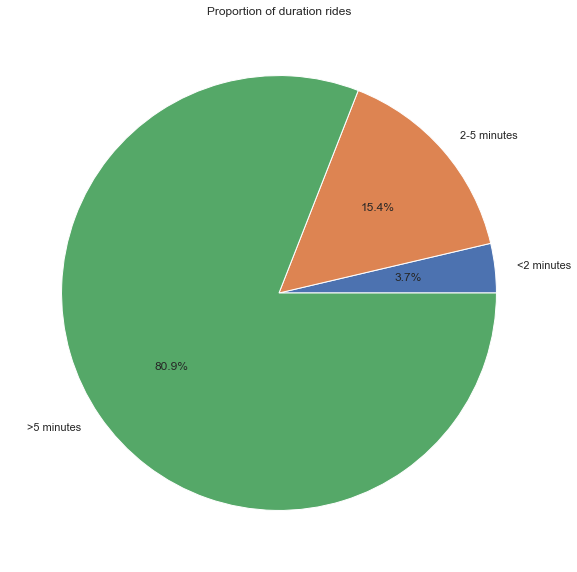

In [33]:
plt.figure(figsize=(15,10))
palette_color = sns.color_palette('bright')

  
# plotting data on chart
plt.pie(time_labels.values, labels=time_labels.index, autopct='%1.1f%%')
plt.title('Proportion of duration rides')
# displaying chart
plt.show()